In [1]:
import numpy as np
import scipy.integrate as integrate
import scipy.stats as stats
from scipy.optimize import brentq

# Define the probability density function (PDF)
def pdf(y):
    return np.exp(-3 * y**2)

# Calculate the probability that Y falls between 2 and 4 hours
probability_2_to_4, _ = integrate.quad(pdf, 2, 4)

# Calculate 25%,50% and 75% of the total probability mass between 2 and 4 hours
quarter_1_25 = 0.25 * probability_2_to_4
quarter_2_50 = 0.50 * probability_2_to_4
quarter_3_75 = 0.75 * probability_2_to_4

# Define a function to compute the cumulative probability from 2 to q
def cumulative_probability_from_2(q):
    return integrate.quad(pdf, 2, q)[0]

# To compute the mean and variance, define the extended PDF and moments functions
def mean_function(y):
    return y * pdf(y)

# Define the function for y^2 * PDF(y)
def second_moment_function(y):
    return y**2 * pdf(y)

# Calculate mean
mean_numerator = integrate.quad(mean_function, 2, 4)[0]
mean_y = mean_numerator/probability_2_to_4

# Calculate the expected value of Y^2 within the interval [2, 4]
expected_y_squared, _ = integrate.quad(second_moment_function, 2, 4)
# Calculate the variance using the formula
variance_y = (expected_y_squared / probability_2_to_4) - (mean_y**2)

# Find quartiles such that the cumulative probability from 2 to q is equal to 25%,50%,75% of the total probability from 2 to 4
q1_25 = brentq(lambda q: cumulative_probability_from_2(q) - quarter_1_25, 2, 4)
q2_50 = brentq(lambda q: cumulative_probability_from_2(q) - quarter_2_50, 2, 4)
q3_75 = brentq(lambda q: cumulative_probability_from_2(q) - quarter_3_75, 2, 4)

probability_2_to_4, mean_y, variance_y, q1_25, q2_50, q3_75


(4.929144781159577e-07,
 2.0775112878312845,
 0.0056360912628310444,
 2.0229564898618735,
 2.054905802163929,
 2.1084753808318824)

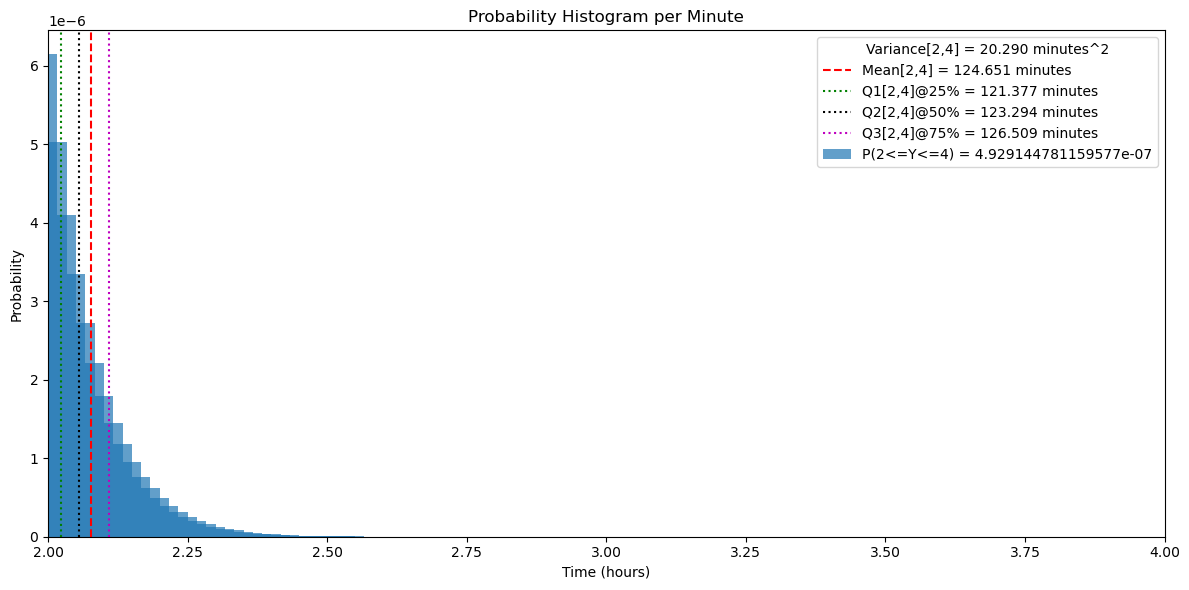

In [6]:
import matplotlib.pyplot as plt


# Create histogram data
# To create a histogram for minute intervals, use a more granular range from 2 to 4 hours (since we're interested in this range)
minutes_range = np.linspace(2, 4, 121)  # 121 points from 2 to 4 hours (1 minute intervals)
histogram_values = pdf(minutes_range)

# Plotting the PDF
plt.figure(figsize=(12, 6))
plt.bar(minutes_range, histogram_values, width=1/30, label=f'P(2<=Y<=4) = {probability_2_to_4}', alpha=0.7)
plt.title('Probability Histogram per Minute')
plt.xlabel('Time (hours)')
plt.ylabel('Probability')
plt.axvline(x=mean_y, color='r', linestyle='--', label=f'Mean[2,4] = {(mean_y*60):.3f} minutes')
plt.axvline(x=q1_25, color='g', linestyle=':', label=f'Q1[2,4]@25% = {(q1_25*60):.3f} minutes')
plt.axvline(x=q2_50, color='k', linestyle=':', label=f'Q2[2,4]@50% = {(q2_50*60):.3f} minutes')
plt.axvline(x=q3_75, color='m', linestyle=':', label=f'Q3[2,4]@75% = {(q3_75*60):.3f} minutes')
plt.xlim(2, 4)
plt.tight_layout()
plt.legend(title=f'Variance[2,4] = {variance_y*3600:.3f} minutes^2')
plt.show()
